# Lab 4

## Import libs and connect to a database

In [1]:
import pandas
import configparser
import psycopg2

In [3]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [4]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db
                        )

In [5]:
cur = conn.cursor()

## Question 1

In [10]:
sql_q1 = "select * from student"

In [12]:
df = pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,s4@jmu.edu,s4,ISAT
1,s3@jmu.edu,s3,ISAT
2,s2@jmu.edu,s2,IA
3,s1@jmu.edu,s1,IA


## Question 2

In [15]:
sql_q2 = "select professor.p_name, course.c_name from professor inner join course on professor.p_email = course.p_email"

In [17]:
df = pandas.read_sql_query(sql_q2, conn)
df[:]

,p_name,c_name
0,p3,facebook
1,p2,mongodb
2,p3,postgresql
3,p3,twitter


## Question 3

In [20]:
sql_q3 = "select c_number, count(c_number) as enrolled from enroll group by c_number order by enrolled desc"

<AxesSubplot:xlabel='c_number'>

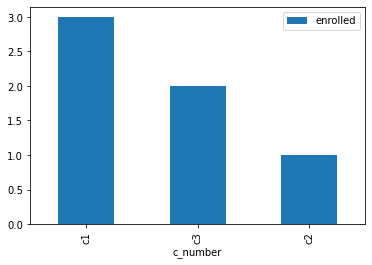

In [22]:
df=pandas.read_sql_query(sql_q3, conn)
df.plot.bar(y='enrolled', x='c_number')

## Question 4

In [25]:
sql_q4 = "select professor.p_name, count(course.c_name) as teaching_number from professor inner join course on professor.p_email = course.p_email group by professor.p_name order by teaching_number desc"

<AxesSubplot:xlabel='p_name'>

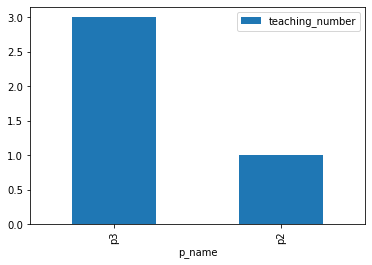

In [31]:
df = pandas.read_sql_query(sql_q4, conn)
df.plot.bar(y = 'teaching_number', x='p_name')

## Question 5

In [38]:
sql_q5_professor= "insert into professor(p_email,p_name,office) values('{}','{}','{}')".format('p4@jmu.edu','p4','o4')

In [39]:
cur.execute(sql_q5_professor)

In [40]:
conn.commit()

In [42]:
df=pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,office
0,p3@jmu.edu,p3,o3
1,p2@jmu.edu,p2,o2
2,p4@jmu.edu,p4,o4


In [43]:
sql_q5_course = "insert into course(c_number,c_name,room,p_email) values('{}','{}','{}','{}')".format('c5','linkedin','r2','p4@jmu.edu')

In [44]:
cur.execute(sql_q5_course)

In [45]:
conn.commit()

In [46]:
df=pandas.read_sql_query('select * from course', conn)
df[:]

,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c2,mongodb,r2,p2@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


## Question 6

In [47]:
sql_q6_course = "update course set p_email = '{}' where p_email = '{}'".format('p4@jmu.edu','p2@jmu.edu')

In [48]:
cur.execute(sql_q6_course)

In [49]:
conn.commit()

In [50]:
df=pandas.read_sql_query('select * from course', conn)
df[:]

,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [51]:
sql_q6_professor = "delete from professor where p_email = '{}'".format('p2@jmu.edu')

In [52]:
cur.execute(sql_q6_professor)

In [53]:
conn.commit()

In [54]:
df=pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,office
0,p3@jmu.edu,p3,o3
1,p4@jmu.edu,p4,o4


## Close

In [55]:
cur.close()
conn.close()